# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [130]:
#Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import  tt_ind_solve_power

df = pd.read_csv("multipleChoiceResponses_cleaned.csv")
df.head(25)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, resu

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important,NaN,NaN
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802310,64184.8
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017402,20882.4


In [131]:
df.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorTitle', 'JobFactorCompanyFunding', 'JobFactorImpact',
       'JobFactorRemote', 'JobFactorIndustry', 'JobFactorLeaderReputation',
       'JobFactorDiversity', 'JobFactorPublishingOpportunity', 'exchangeRate',
       'AdjustedCompensation'],
      dtype='object', length=230)

In [132]:
df['FormalEducation'].head()

0    Bachelor's degree
1      Master's degree
2      Master's degree
3      Master's degree
4      Doctoral degree
Name: FormalEducation, dtype: object

In [133]:
df['FormalEducation'].describe()

count               18142
unique                  7
top       Master's degree
freq                 8204
Name: FormalEducation, dtype: object

In [134]:
df['AdjustedCompensation'].head()

0         NaN
1         NaN
2         NaN
3    250000.0
4         NaN
Name: AdjustedCompensation, dtype: float64

In [136]:
df['AdjustedCompensation'].unique()

array([        nan, 2.50000e+05, 6.41848e+04, ..., 3.18780e+04,
       3.33600e+03, 1.00000e+00])

In [135]:
df['AdjustedCompensation'].describe()

count    4.343000e+03
mean     6.636071e+06
std      4.293996e+08
min     -7.351631e+01
25%      2.036942e+04
50%      5.381217e+04
75%      9.566608e+04
max      2.829740e+10
Name: AdjustedCompensation, dtype: float64

In [137]:
df.values

array([['Non-binary, genderqueer, or gender non-conforming', nan, nan,
        ..., nan, nan, nan],
       ['Female', 'United States', '30.0', ..., nan, nan, nan],
       ['Male', 'Canada', '28.0', ..., 'Very Important', nan, nan],
       ...,
       ['Female', 'Taiwan', '25.0', ..., nan, nan, nan],
       ['Female', 'Singapore', '16.0', ..., nan, nan, nan],
       ['Male', 'Japan', '27.0', ..., nan, nan, nan]], dtype=object)

In [138]:
df.Age.describe()

count     19550
unique      101
top        37.0
freq       2315
Name: Age, dtype: object

In [139]:
df.FormalEducation.describe()

count               18142
unique                  7
top       Master's degree
freq                 8204
Name: FormalEducation, dtype: object

In [140]:
df_schema = pd.read_csv("schema.csv")
df_schema.head(25)

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All
5,StudentStatus,Are you currently enrolled as a student at a d...,Non-worker
6,LearningDataScience,Are you currently focused on learning data sci...,Non-worker
7,KaggleMotivationFreeForm,What's your motivation for being a Kaggle user?,Non-switcher
8,CodeWriter,Do you write code to analyze data in your curr...,Worker1
9,CareerSwitcher,Are you actively looking to switch careers to ...,Worker1


In [141]:
new_df = df[['AdjustedCompensation','FormalEducation']].copy()
new_df.head()

,AdjustedCompensation,FormalEducation
0,NaN,Bachelor's degree
1,NaN,Master's degree
2,NaN,Master's degree
3,250000.0,Master's degree
4,NaN,Doctoral degree


In [142]:
wage_vs_ed = new_df.dropna()
wage_vs_ed.head()

,AdjustedCompensation,FormalEducation
3,250000.0,Master's degree
8,64184.8,Bachelor's degree
9,20882.4,Bachelor's degree
11,1483.9,Bachelor's degree
14,36634.4,Master's degree


In [143]:
wage_vs_ed = wage_vs_ed.reset_index(drop=True)
wage_vs_ed.head(25)

,AdjustedCompensation,FormalEducation
0,250000.000,Master's degree
1,64184.800,Bachelor's degree
2,20882.400,Bachelor's degree
3,1483.900,Bachelor's degree
4,36634.400,Master's degree
5,20000.000,Bachelor's degree
6,100000.000,Doctoral degree
7,916.400,Some college/university study without earning ...
8,10858.848,Bachelor's degree
9,53352.000,Master's degree


In [145]:
wage_vs_ed.FormalEducation.unique()

array(["Master's degree", "Bachelor's degree", 'Doctoral degree',
       "Some college/university study without earning a bachelor's degree",
       'I did not complete any formal education past high school',
       'Professional degree', 'I prefer not to answer'], dtype=object)

In [146]:
wage_vs_ed.FormalEducation.describe()

count                4342
unique                  7
top       Master's degree
freq                 1990
Name: FormalEducation, dtype: object

In [147]:
wage_vs_ed.AdjustedCompensation.min()

-73.516311

In [148]:
wage_vs_ed.loc[wage_vs_ed['AdjustedCompensation'] <= 0]

,AdjustedCompensation,FormalEducation
76,0.000000,Master's degree
219,0.000000,Bachelor's degree
221,0.000000,Master's degree
351,0.000000,Master's degree
364,0.000000,I did not complete any formal education past h...
400,0.000000,Master's degree
453,0.000000,Master's degree
514,0.000000,Master's degree
578,0.000000,Master's degree
628,0.000000,I did not complete any formal education past h...


In [149]:
wage_vs_ed.loc[wage_vs_ed['AdjustedCompensation'] <= 0].count()

AdjustedCompensation    40
FormalEducation         40
dtype: int64

In [153]:
wage_vs_ed = wage_vs_ed[wage_vs_ed.AdjustedCompensation > 0]
wage_vs_ed.head()

,AdjustedCompensation,FormalEducation
0,250000.0,Master's degree
1,64184.8,Bachelor's degree
2,20882.4,Bachelor's degree
3,1483.9,Bachelor's degree
4,36634.4,Master's degree


In [154]:
wage_vs_ed.AdjustedCompensation.describe()

count    4.302000e+03
mean     6.699305e+06
std      4.314409e+08
min      6.000000e-02
25%      2.152487e+04
50%      5.399340e+04
75%      9.627720e+04
max      2.829740e+10
Name: AdjustedCompensation, dtype: float64

In [75]:
# I can't get cat.codes to work
#wage_vs_ed.FormalEducation.astype("category").cat.codes.head()


0    4
1    0
2    0
3    0
4    4
dtype: int8

In [108]:
# I can't get cat.codes to work
#wage_vs_ed["FormalEducation"].cat.codes
#wage_vs_ed.head()

In [ ]:
# Thought about trying to drop things here
# wage_vs_ed[wage_vs_ed.FormalEducation != "1", "2", "3"]


In [111]:
# Tried something different here
"""
def score_to_numeric(x):
    if x=="Some college/university study without earning a bachelor's degree":
        return 0
    if x=="I did not complete any formal education past high school":
        return 0
    if x=="Professional degree":
        return 0
    if x=="I prefer not to answer":
        return 0
"""    
# wage_vs_ed['FormalEducation'] = wage_vs_ed['FormalEducation'].apply(score_to_numeric)
# wage_vs_ed.head(20)

'\ndef score_to_numeric(x):\n    if x=="Some college/university study without earning a bachelor\'s degree":\n        return 0\n    if x=="I did not complete any formal education past high school":\n        return 0\n    if x=="Professional degree":\n        return 0\n    if x=="I prefer not to answer":\n        return 0\n'

In [155]:
cleanup_nums = {"FormalEducation":  {"Doctoral degree": 3,
                                     "Master's degree": 2, 
                                     "Bachelor's degree": 1,
                                     "Some college/university study without earning a bachelor's degree": 0,
                                     "I did not complete any formal education past high school": 0,
                                     "Professional degree": 0,
                                     "I prefer not to answer": 0}
                                                                }

wage_vs_ed.replace(cleanup_nums, inplace=True)
wage_vs_ed.head(20)

,AdjustedCompensation,FormalEducation
0,250000.000,2
1,64184.800,1
2,20882.400,1
3,1483.900,1
4,36634.400,2
5,20000.000,1
6,100000.000,3
7,916.400,0
8,10858.848,1
9,53352.000,2


In [166]:
# %load flatiron_stats.py
#flatiron_stats
import numpy as np
import scipy.stats as stats

def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. This function returns the degrees of freedom """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator


def p_value_welch_ttest(a, b, two_sided=False):
    """Calculates the p-value for Welch's t-test given two samples.
    By default, the returned p-value is for a one-sided t-test. 
    Set the two-sided parameter to True if you wish to perform a two-sided t-test instead.
    """
    t = welch_t(a, b)
    df = welch_df(a, b)
    
    p = 1-stats.t.cdf(np.abs(t), df)
    
    if two_sided:
        return 2*p
    else:
        return p

In [169]:
p_value_welch_ttest(wage_vs_ed.FormalEducation, wage_vs_ed.AdjustedCompensation, two_sided=False)

0.15425861333099378

In [170]:
# Is it two-sided or not?

In [171]:
p_value_welch_ttest(wage_vs_ed.FormalEducation, wage_vs_ed.AdjustedCompensation, two_sided=True)

0.30851722666198755

In [163]:
# Again but more specific... not working

In [173]:
masters = wage_vs_ed[wage_vs_ed.FormalEducation == 2]
bachelors = wage_vs_ed[wage_vs_ed.FormalEducation == 1]
masters.head(), bachelors.head()

(    AdjustedCompensation  FormalEducation
 0             250000.000                2
 4              36634.400                2
 9              53352.000                2
 11             35419.104                2
 14             80000.000                2,
    AdjustedCompensation  FormalEducation
 1             64184.800                1
 2             20882.400                1
 3              1483.900                1
 5             20000.000                1
 8             10858.848                1)

In [201]:
m1 = masters.AdjustedCompensation.mean()
m2 = masters.AdjustedCompensation.std()
m3 = len(masters.AdjustedCompensation)
b1 = bachelors.AdjustedCompensation.mean()
b2 = bachelors.AdjustedCompensation.std()
b3 = len(bachelors.AdjustedCompensation)

print(m1)
print(m2)
print(m3)
print(b1)
print(b2)
print(b3)

69877.29849857188
136059.05566640137
1969
65359.433557818935
308001.84904883505
1099


In [177]:
p_value_welch_ttest(masters.AdjustedCompensation, bachelors.AdjustedCompensation, two_sided=False)

0.3221593124062694

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [178]:
doctorate = wage_vs_ed[wage_vs_ed.FormalEducation == 3]


In [180]:
p_value_welch_ttest(doctorate.AdjustedCompensation, bachelors.AdjustedCompensation, two_sided=False)

0.15682556400196068

In [11]:
#Your code here

Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.1568238199472023


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [181]:
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [ ]:
#Your code here

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!

In [ ]:
# Their code

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [192]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


In [194]:
import flatiron_stats as fs


In [195]:
#Subset the appropriate data into 2 groups
f1 = 'FormalEducation'
f2 = 'AdjustedCompensation'
f1c1 = "Master's degree"
f1c2 = "Bachelor's degree"
subset = df[(~df[f1].isnull()) & (~df[f2].isnull())]
s1 = subset[subset[f1]==f1c1][f2]
s2 = subset[subset[f1]==f1c2][f2]

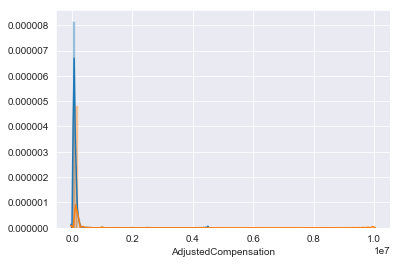

In [196]:
sns.distplot(s1)
sns.distplot(s2)

In [197]:
print('Comparison of {} for {} and {}'.format(f2, f1c1, f1c2))
print("Median Values: \ts1: {} \ts2: {}".format(round(s1.median(),2), round(s2.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(s1.mean(),2), round(s2.mean(),2)))
print('Sample sizes: \ts1: {} \ts2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value:", fs.p_value_welch_ttest(s1, s2))

Comparison of AdjustedCompensation for Master's degree and Bachelor's degree
Median Values: 	s1: 53812.17 	s2: 38399.4
Mean Values: 	s1: 69139.9 	s2: 64887.1
Sample sizes: 	s1: 1990 	s2: 1107
Welch's t-test p-value: 0.33077639451272445


In [199]:
#Investigate Percentiles
for q in np.linspace(.8, 1, num=21):
    s1q =  round(s1.quantile(q=q), 2)
    s2q =  round(s2.quantile(q=q), 2)
    print('{}th percentile:\tset1: {}\tset2: {}'.format(round(q,2), s1q, s2q))

0.8th percentile:	set1: 103000.0	set2: 93233.13
0.81th percentile:	set1: 107009.0	set2: 95572.83
0.82th percentile:	set1: 110000.0	set2: 99276.38
0.83th percentile:	set1: 111503.83	set2: 100000.0
0.84th percentile:	set1: 115240.4	set2: 103040.0
0.85th percentile:	set1: 119582.6	set2: 105935.04
0.86th percentile:	set1: 120000.0	set2: 110000.0
0.87th percentile:	set1: 124719.88	set2: 112000.0
0.88th percentile:	set1: 129421.46	set2: 115000.0
0.89th percentile:	set1: 130000.0	set2: 120000.0
0.9th percentile:	set1: 135000.0	set2: 120346.5
0.91th percentile:	set1: 140000.0	set2: 126460.0
0.92th percentile:	set1: 149640.0	set2: 132615.4
0.93th percentile:	set1: 150000.0	set2: 140000.0
0.94th percentile:	set1: 160000.0	set2: 143408.8
0.95th percentile:	set1: 166778.6	set2: 150000.0
0.96th percentile:	set1: 180000.0	set2: 179849.74
0.97th percentile:	set1: 200000.0	set2: 195000.0
0.98th percentile:	set1: 211100.0	set2: 200000.0
0.99th percentile:	set1: 250000.0	set2: 250000.0
1.0th percentile:

In [200]:
print('Repeated Test with Outliers Removed:')
print('S1: {}\tS2: {}'.format(f1c1, f1c2))
outlier_threshold = 500000
s1 = subset[(subset[f1]==f1c1) & (subset[f2]<=outlier_threshold)][f2]
s2 = subset[(subset[f1]==f1c2) & (subset[f2]<=outlier_threshold)][f2]
print("Median Values: \ts1: {} \ts2: {}".format(round(s1.median(),2), round(s2.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(s1.mean(),2), round(s2.mean(),2)))
print('Sample sizes: \ts1: {} \ts2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value with outliers removed:", fs.p_value_welch_ttest(s1, s2))

Repeated Test with Outliers Removed:
S1: Master's degree	S2: Bachelor's degree
Median Values: 	s1: 53539.72 	s2: 38292.15
Mean Values: 	s1: 63976.63 	s2: 53744.35
Sample sizes: 	s1: 1985 	s2: 1103
Welch's t-test p-value with outliers removed: 4.4874583271514723e-07


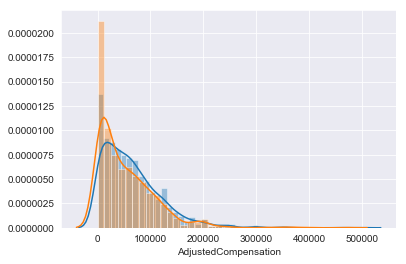

In [202]:
sns.distplot(s1)
sns.distplot(s2)

In [203]:
f1 = 'FormalEducation'
f2 = 'AdjustedCompensation'
subset = df[(~df[f1].isnull()) & (~df[f2].isnull())]
s1 = subset[subset[f1]=="Doctoral degree"][f2]
s2 = subset[subset[f1]=="Bachelor's degree"][f2]
print("Median Values: \ns1:{} \ns2:{}".format(round(s1.median(),2), round(s2.median(),2)))
print('Sample sizes: \ns1: {} \ns2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value:", fs.p_value_welch_ttest(s1, s2))

print('\n\nRepeated Test with Ouliers Removed:')
outlier_threshold = 500000
s1 = subset[(subset[f1]=="Doctoral degree") & (subset[f2]<=outlier_threshold)][f2]
s2 = subset[(subset[f1]=="Bachelor's degree") & (subset[f2]<=outlier_threshold)][f2]
print('Sample sizes: \ns1: {} \ns2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value with outliers removed:", fs.p_value_welch_ttest(s1, s2))

Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.15682381994720251


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


In [204]:
#Perform ANOVA here
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = '{} ~ C({})'.format(f2, f1)
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [205]:
temp = df[df[f2]<=5*10**5]
formula = '{} ~ C({})'.format(f2, f1)
lm = ols(formula, temp).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN
